In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydicom, pylab, os, tqdm

# Quick color declaration
greyscale = pylab.cm.gist_gray

# Declare filepaths
bin_path = r'H:\rsna-pneumonia-detection-challenge\stage_2_train_labels.csv'
detailed_path = r'H:\rsna-pneumonia-detection-challenge\stage_2_detailed_class_info.csv'
base_path = r'H:\rsna-pneumonia-detection-challenge\stage_2_train_images'
class_0 = os.path.join(base_path,'class_0')
class_1 = os.path.join(base_path,'class_1')
class_2 = os.path.join(base_path,'class_2')

# Read in .csv's
bin_df = pd.read_csv(bin_path)
detailed_df = pd.read_csv(detailed_path)
detailed_df['class'].replace('No Lung Opacity / Not Normal', 'class_1',inplace=True)
detailed_df['class'].replace('Normal','class_0',inplace=True)
detailed_df['class'].replace('Lung Opacity','class_2',inplace=True)
    
# Simplify reading in .dcm files and viewing them:
def read_dcm(filename): # Easy way to read dcm files you choose
    deets = detailed_df[detailed_df['patientId']==filename]
    path = os.path.join(base_path,deets['class'].iloc[0],filename+'.dcm')
    dcm_data = pydicom.read_file(path)
    return dcm_data

def image_show(filename): # Easy way to view dcm images
    dcm = read_dcm(filename)
    return pylab.imshow(dcm.pixel_array,cmap=greyscale)

#Make dicts, may be useful later
#data_dict = {}
#data_dict['class_0'] = []
#data_dict['class_1'] = []
#data_dict['class_2'] = []
#for i in tqdm.tqdm(range(len(detailed_df['patientId']))):
#    temp = detailed_df.loc[i]
#    data_dict[temp['class']].append(temp['patientId'])

Text(0, 0.5, 'Number of patients')

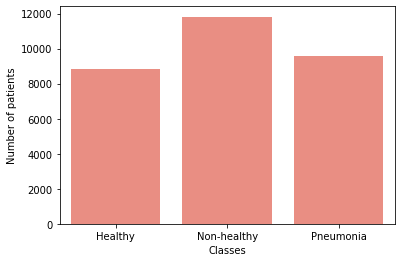

In [39]:
detailed_count = detailed_df.groupby('class').count()
detailed_plot = sns.barplot(x=['Healthy','Non-healthy','Pneumonia'],y=detailed_count['patientId'],data=detailed_count,ci=None,estimator=sum,color='salmon')
detailed_plot.set_xlabel('Classes')
detailed_plot.set_ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

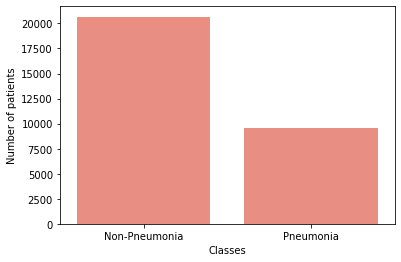

In [50]:
bin_count = bin_df[['Target','patientId']].groupby('Target').count()
bin_plot = sns.barplot(x=['Non-Pneumonia','Pneumonia'],y=bin_count['patientId'],data=bin_count,ci=None,estimator=sum,color='salmon')
bin_plot.set_xlabel('Classes')
bin_plot.set_ylabel('Number of patients')

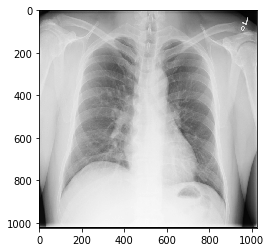

In [3]:
healthy = image_show('c1f6b555-2eb1-4231-98f6-50a963976431')

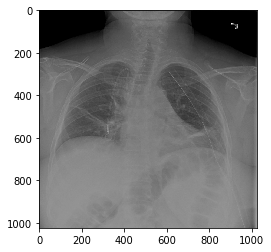

In [4]:
nonhealthy = image_show('00313ee0-9eaa-42f4-b0ab-c148ed3241cd')

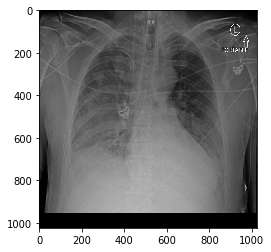

In [5]:
pneumonia = image_show('c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8')